In [63]:
import matplotlib.pyplot as plt
from utils import load_analysis_ready_text
import numpy as np

%matplotlib inline

FILE1 = '../data/005.txt'
FILE2 = '../data/017.txt'

In [64]:
txt1 = load_analysis_ready_text(FILE1)
txt2 = load_analysis_ready_text(FILE2)

In [65]:
print(len(txt1), len(txt2))

5410 6709


In [66]:
l1 = [len(word) for word in txt1.split()]
sample_mean_1 = np.mean(l1)
sample_var_1 = np.var(l1, ddof = 1)
print(f'Smpl mean: {sample_mean_1}, smpl var: {sample_var_1}')

l2 = [len(word) for word in txt2.split()]
sample_mean_2 = np.mean(l2)
sample_var_2 = np.var(l2, ddof = 1)
print(f'Smpl mean: {sample_mean_2}, smpl var: {sample_var_2}')

Smpl mean: 4.010185185185185, smpl var: 4.451240002746027
Smpl mean: 4.283464566929134, smpl var: 5.0732488226205765


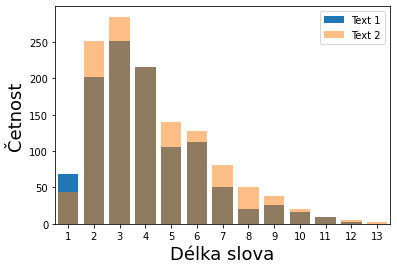

In [67]:
from collections import Counter

c1 = Counter(l1)
c2 = Counter(l2)

lens1, cnts1 = zip(*c1.items())
lens2, cnts2 = zip(*c2.items())

fig, ax1 = plt.subplots()

ax1.bar(lens1, cnts1, label='Text 1')
ax1.bar(lens2, cnts2, alpha = 0.5, label='Text 2')
ax1.legend()
ax1.set_xticks(lens2)
ax1.set_ylabel('Četnost', size=18)
ax1.set_xlabel('Délka slova', size=18)
ax1.set_xlim(0.5,13.5)
fig.savefig('img/wdistr.png',dpi=300)

In [68]:
print(sum(cnts1))
print(sum(cnts2))

1080
1270


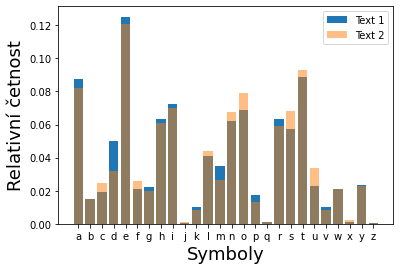

In [69]:
cc1 = Counter(txt1)
cc2 = Counter(txt2)

del cc1[' ']
del cc2[' ']

cc1 = sorted(cc1.items())
cc2 = sorted(cc2.items())

char1, cnts1 = zip(*cc1)
char2, cnts2 = zip(*cc2)

ttl1 = sum(cnts1)
ttl2 = sum(cnts2)

cnts1 = [cnt/ttl1 for cnt in cnts1]
cnts2 = [cnt/ttl2 for cnt in cnts2]

fig, ax1 = plt.subplots()

ax1.bar(char1, cnts1, label='Text 1')
ax1.bar(char2, cnts2, alpha = 0.5, label='Text 2')
ax1.legend()
ax1.set_xticks(char1)
ax1.set_ylabel('Relativní četnost', size=18)
ax1.set_xlabel('Symboly', size=18)
fig.savefig('img/chdistr.png',dpi=300)

In [70]:
from scipy.stats.contingency import chi2_contingency, margins, expected_freq
from scipy.stats import chi2

alpha = .05

_, cnts1 = zip(*sorted(c1.items()))
_, cnts2 = zip(*sorted(c2.items()))

cnts1 = list(cnts1)
cnts2 = list(cnts2)

cnts1[-2] += cnts1[-1]
cnts1.pop()
cnts2[-2] += cnts2[-1]
cnts2[-3] += cnts2[-2]
cnts2.pop()
cnts2.pop()

cntg_table = np.stack((cnts1,cnts2))
print(expected_freq(cntg_table))

chi2stat, p, dof, expected = chi2_contingency(cntg_table)
#print(margins(cntg_table))
print(cntg_table)
print(chi2stat)
print(p)
print(dof)
#print(expected)
print(chi2.ppf(1-alpha, df=dof))
chi2.ppf(1-p, df=dof)


[[ 51.47234043 208.18723404 246.33191489 198.53617021 113.05531915
  110.75744681  60.66382979  32.17021277  29.41276596  16.54468085
   12.86808511]
 [ 60.52765957 244.81276596 289.66808511 233.46382979 132.94468085
  130.24255319  71.33617021  37.82978723  34.58723404  19.45531915
   15.13191489]]
[[ 68 202 251 216 106 113  51  20  26  16  11]
 [ 44 251 285 216 140 128  81  50  38  20  17]]
26.700913595344133
0.0029035185289408576
10
18.307038053275146


26.700913595344108

In [71]:
from scipy.stats import levene, ttest_ind, t

s, p = levene(l1, l2)
print(s)
print(p)

T, ptt = ttest_ind(l1, l2, equal_var=False)
print(T)
print(ptt)
print(abs(T))




4.838281244085883
0.02793176202378154
-3.0334051923310863
0.0024448389907806727
3.0334051923310863


In [72]:
_, cnts1 = zip(*sorted(cc1))
_, cnts2 = zip(*sorted(cc2))
cnts1 = list(cnts1)
cnts2 = list(cnts2)

cnts1[9] += cnts1[16] + cnts1[23] + cnts1[25]
cnts2[9] += cnts2[16] + cnts2[23] + cnts2[25]
cnts1.pop(25)
cnts1.pop(23)
cnts1.pop(16)
cnts2.pop(25)
cnts2.pop(23)
cnts2.pop(16)

cnts1 = np.array(cnts1)
cnts2 = np.array(cnts2)

cntg_table = np.stack((cnts1,cnts2))
chi2stat, p, dof, expected = chi2_contingency(cntg_table)
#print(margins(cntg_table))
#print(cntg_table)
print(chi2stat)
print(p)
print(dof)
#print(expected)

print(chi2.ppf(1-alpha, df=dof))

60.431126408841045
1.929159255713764e-05
22
33.92443847144381
